# STA130 HW 4

Rasyid Rafi Pamuji

Student Number: 1011270081

## 1. To answer this question, I asked help from ChatGPT to fully understand the main points of using Standard Error of Mean and Standard Deviation.

Below is the summary of our chat:

In our conversation, we discussed the difference between **standard deviation (SD)** and **standard error of the mean (SEM)**:

- **Standard deviation (SD)** measures the **spread** or **dispersion** of individual data points in a dataset, showing how much they deviate from the mean.
- **Standard error of the mean (SEM)** quantifies the variability of **sample means** if we repeatedly took samples from the population. In the context of **bootstrapping**, SEM reflects the **spread of the sample means** generated from resampling the original data multiple times. It helps estimate how accurately the sample mean represents the population mean.

Bootstrapping involves resampling with replacement, and the SEM from these bootstrap samples gives an idea of the uncertainty in the mean estimate.

Chatbot log link: https://chatgpt.com/share/66fcaf22-938c-8004-9b7b-6ddfb5499789

In my own words, from the Bootstrapping video, the standard deviation is the spread of each individual point in the dataset. Meanwhile, the standard error of the mean is the variability of the sample means that are taken from each repeated sample that are sampled with replacement through the process of bootstrapping.

Standard deviation can be used to describe the dispersion of the data points in a sample or a population. Standard error of the mean can be used to infer the population mean. If the sample size is large enough, the SEM would show accurate results.

## 2. These are the steps to achieve the Confidence Interval:

### Step 1: Bootstrapping and Getting the Sample Means

Bootstrap after a number of times and calculate the sample means for each time you bootstrap.

### Step 2: Calculate the Standard Error of the Mean (SEM)

Using the formula for calculating the SEM:

SEM = (Standard Deviation of the Sample Means) / sqrt(number of samples)

### Step 3: Confidence Interval Basics

95% Confidence Interval means we are 95% sure the true population lies between the a certain interval.

### Step 4: Using the Z-Score for 95% Confidence

Using Z-Score = 1.96, we use it to calculate the confidence interval using its formula.

### Step 5: Putting it All Together to Find the Confidence Interval

Confidence Interval=Mean of Bootstrapped Sample Means±(1.96×SEM)

The results would be the range of 95% of the bootstrapped sample means, which means the true mean is within the interval.

The steps I used were given to me by my Chatbot. This is the summary of our conversation:

We discussed how to create a 95% confidence interval using the Standard Error of the Mean (SEM) from bootstrapped sample means. Here's a summary of the process:

1. **Bootstrapping**: Randomly resample from the original dataset and calculate the mean for each resampled dataset. This gives a distribution of bootstrapped sample means.
  
2. **Calculate the SEM**: Use the standard deviation of the bootstrapped sample means, divided by the square root of the number of samples.
  
3. **Use the Z-score for 95% Confidence**: A 95% confidence interval uses a Z-score of 1.96.

4. **Compute the Confidence Interval**: 
   \[
   \text{Confidence Interval} = \text{Mean of Bootstrapped Sample Means} \pm (1.96 \times SEM)
   \]
This interval should cover 95% of the bootstrapped sample means, providing an estimate of where the true population mean lies.

Chatbot log link: https://chatgpt.com/share/66fcbcae-bcb0-8004-b786-8e9876624b7e

## 3. To create a 95% bootstrapped confidence interval using the bootstrapped means, these are the steps needed:

To demonstrate understanding of using the bootstrapped means, I'd like to explain it in terms of np.quantile using this example code:

In [5]:
import numpy as np

# Original data
data = np.array([50, 52, 47, 60, 55, 58, 50, 49, 55, 53])

# Parameters for bootstrapping
n_iterations = 10000  # Number of bootstrap samples
n_size = len(data)    # Size of each bootstrap sample

# Generate bootstrap samples and calculate their means
boot_means = []
for _ in range(n_iterations):
    sample = np.random.choice(data, size=n_size, replace=True)
    boot_means.append(np.mean(sample))

# Convert the list of means to a NumPy array and sort it
boot_means = np.array(boot_means)
boot_means.sort()

# Calculate the 95% confidence interval using quantiles
lower_bound = np.quantile(boot_means, 0.025)  # 2.5th percentile
upper_bound = np.quantile(boot_means, 0.975)  # 97.5th percentile

# Display the confidence interval
confidence_interval = (lower_bound, upper_bound)
print(f"95% Bootstrapped Confidence Interval: {confidence_interval}")


95% Bootstrapped Confidence Interval: (50.5, 55.4)


### Step 1: Collect Your Original Data

We need an original dataset needed to be bootstrapped.

### Step 2: Generate Bootstrapped Samples

Bootstrap the dataset by randomly selecting data points.

### Step 3: Sort the Bootstrapped Means

Calculate the means of the bootstrapped samples and sort them.

### Step 4: Determine the Confidence Interval Using Quantiles

To create a 95% confidence interval, we need to use the 2.5th and 97.5th percentiles of the sorted bootstrapped means, leaving the lower and upper 2.5% of the means.

The explanation is with the help of ChatGPT, but explained in my own words. This is the summary of our session:

Certainly! Here’s a summary of our session:

1. **Bootstrapping Explanation**: We discussed the concept of bootstrapping, a resampling technique that allows us to estimate the distribution of a statistic by repeatedly drawing samples from an original dataset with replacement.

2. **Creating a 95% Bootstrapped Confidence Interval**:
   - **Steps Involved**:
     - **Collect Original Data**: Start with a numerical dataset.
     - **Generate Bootstrapped Samples**: Randomly sample from the original data with replacement, creating multiple samples of the same size.
     - **Calculate Bootstrapped Means**: For each bootstrapped sample, compute the mean, resulting in a distribution of bootstrapped means.
     - **Sort Bootstrapped Means**: Sort the means to facilitate quantile calculations.
     - **Determine Confidence Interval**: Use the 2.5th and 97.5th percentiles to establish a 95% confidence interval for the mean.
   - **Code Example**: We provided a complete Python code snippet demonstrating these steps, using NumPy functions like `np.random.choice()` and `np.quantile()`.

3. **Understanding `np.quantile`**: We explored how the `np.quantile` function works, its parameters, and its purpose in calculating quantiles directly from data, which is essential for constructing confidence intervals.

4. **Practical Example**: We generated a synthetic dataset and applied the bootstrapping method to illustrate how to create a confidence interval based on bootstrapped means.

If you have any more questions or need further clarification on any topic, feel free to ask!

Chatbot log link: https://chatgpt.com/share/66fcc4b4-38b8-8004-a8b7-0780e3097642

## 4. This is the code that I asked ChatGPT to output:

In [12]:
import numpy as np

# Generate a random sample
np.random.seed(42)  # For reproducibility
sample = np.random.normal(loc=100, scale=15, size=100)  # sample of 100 values as an example

# Number of bootstrap resamples
n_bootstraps = 1000

# Stores the bootstrap means. Can change bootstrap_means to bootstrap_medians or any other population parameter that suffices
bootstrap_means = np.empty(n_bootstraps)

# Bootstrap procedure
for i in range(n_bootstraps):
    # Resample with replacement from the original sample
    bootstrap_sample = np.random.choice(sample, size=len(sample), replace=True)
    
    # Calculates the mean of the bootstrap sample. bootstrap_means[i] can be changed to bootstrap_medians[i]
    bootstrap_means[i] = np.mean(bootstrap_sample)

# Calculates the 95% confidence interval (2.5th percentile to 97.5th percentile). Again, bootstrap_means can be changed to bootstrap_medians or any other parameter that suffices
lower_bound = np.percentile(bootstrap_means, 2.5)
upper_bound = np.percentile(bootstrap_means, 97.5)

# Prints the confidence interval. Can change Mean to any other parameter, for example: Median
print(f"95% Bootstrap Confidence Interval for the Mean: [{lower_bound:.2f}, {upper_bound:.2f}]")

95% Bootstrap Confidence Interval for the Mean: [95.91, 100.94]


The code includes comments I made. I deleted comments made by ChatGPT and changed them into my own words.

This is the summary of my Chatbot session:

Sure! Here’s a summary of our session:

1. **Bootstrap Confidence Interval Code**:
   - You requested a Python code snippet to produce a 95% bootstrap confidence interval for a population mean based on a sample. 
   - I provided a code example using NumPy, demonstrating how to generate a sample, perform bootstrap resampling, and calculate the confidence interval for the mean.
   - I explained how to modify the code to calculate the confidence interval for the median instead.

2. **Code Review**:
   - You modified the original code to compute the median instead of the mean by changing the relevant variable names and functions.
   - I confirmed that your modifications were correct and provided the final version of your code, ensuring it accurately calculated the 95% bootstrap confidence interval for the median.

Let me know if you need anything else or if there’s anything specific you’d like to add!

Chatbot log link: https://chatgpt.com/share/66fcca61-18c8-8004-a7f0-f7384fe978a8

## 5. Below is an explanation of the difference between the role of the population parameter and the sample statistic when it comes to confidence intervals:

When it comes to confidence intervals, it is important for us to establish them using population parameters. In order to do that, we need to find and calculate the sample statistic to infer the population parameters. As sample statistics vary, the confidence intervals may change. For our population parameter, we need a sample statistic that is accurate to produce a population parameter that is a good estimate.

Chatbot summary session:

Sure! Here’s a summary of our conversation:

1. **Population Parameters vs. Sample Statistics**:
   - **Population Parameter**: A fixed value that describes an entire population (e.g., the true average height of all adult men in a city).
   - **Sample Statistic**: A variable value calculated from a sample that estimates the population parameter (e.g., the average height of a sample of 100 men).

2. **Confidence Intervals**:
   - Confidence intervals (CIs) provide a range of values likely containing the true population parameter based on sample statistics.
   - They are constructed using the sample mean, standard error, and a chosen confidence level (e.g., 95%).
   - A CI expresses the uncertainty of our estimate and helps quantify how well the sample represents the population.

3. **Estimating Unknown Population Parameters**:
   - We estimate population parameters using data from samples, calculating sample statistics as point estimates.
   - Confidence intervals give a range to account for variability and uncertainty in our estimates.
   - Hypothesis testing can validate assumptions about population parameters.
   - Bayesian methods can incorporate prior knowledge along with sample data for better estimates.

4. **Key Takeaway**:
   - While population parameters are typically unknown, statisticians use sample data and various statistical methods to make informed estimates, quantify uncertainty, and draw conclusions about the larger population.

If you have any other questions or need further clarification on any topic, feel free to ask!

Chatbot log link: https://chatgpt.com/share/66fcd06a-b2a0-8004-bfe7-8f5d6b8958ce

## 6. Answers for each question:

1. In simple terms, bootstrapping is when you resample with replacement from a certain dataset a number of times. We start by getting a dataset and create a sample based on the original dataset. The sample contains the same amount of data points as the original dataset, but the data points themselves can change, but have to be the ones from the original dataset. After that, you can calculate the mean, median, etc. to infer more about the population.

2. Bootstrapping is used to estimate a variability of a dataset when we have limited data. When we have the results of the bootstrapped dataset, we can compare it with the population to see if it's any similar.

3. The first step we need to do is to create bootstrapped samples from our limited sample data (sample with replacement). We then calculate the data from each bootstrapped sample. We then create a distribution (mahybe with a histogram) of the means of each bootstrapped sample. If our bootstrapping result is similar to our hypothesis, then our method is right.

## 7. Explanations for the two questions asked:

Q: Why does a confidence interval overlapping zero "fail to reject the null hypothesis" when the observed sample mean statistic itself is not zero?

A: A confidence interval overlapping zero "fails to reject the null hypothesis" because the confidence interval provides a measure of uncertainty, and if it includes zero, we cannot confidently assert that the drug (or treatment) has an effect, leading it to fail to reject the null hypothesis.

Q: Alternatively, what would lead to the opposite conclusion in this context; namely, instead choosing "to reject the null hypothesis"?

A: To reject the null hypothesis, we need the sample mean to be significantly different from 0, the confidence interval for the mean to exclude 0, a statistically significant p-value (determines the significance of the results from a hypothesis test), and evidence from larger sample sizes or strong experimental designs that bolster the findings.

## 8. Vaccine Data Analysis Assignment:

## A. Problem Introduction

### 1. Null Hypothesis of "no effect"
In this context, the Null Hypothesis states that the vaccine has no effect on the health scores of individuals who receive it, which would mean the average difference in health scores between the initial and final measurements would be zero.

It can be expressed using this formula:
H0:μ 
Final
​
 −μ 
Initial
​
 =0
### 2. Data Visualization

Column Names: Index(['PatientID', 'Age', 'Gender', 'InitialHealthScore', 'FinalHealthScore'], dtype='object')
Cleaned Column Names: Index(['PatientID', 'Age', 'Gender', 'InitialHealthScore', 'FinalHealthScore'], dtype='object')


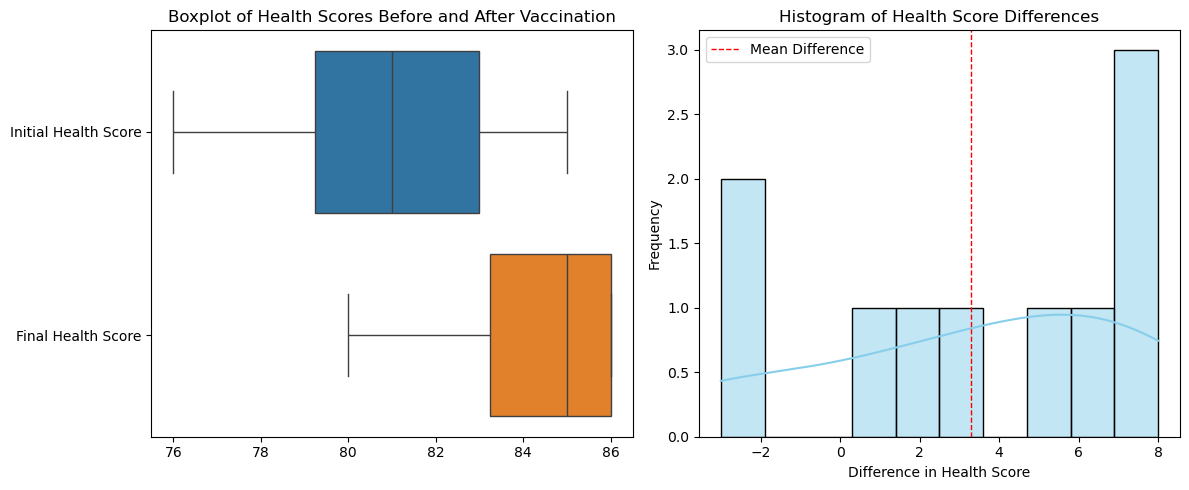

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set the random seed for reproducibility
np.random.seed(42)

# Load Data from CSV file
csv_file_path = 'HW4_aliTech_vaccine_data.csv'  # Use the name of your uploaded file
df = pd.read_csv(csv_file_path)

# Print the column names to debug
print("Column Names:", df.columns)

# Clean the column names by stripping any leading or trailing whitespace
df.columns = df.columns.str.strip()

# Check the cleaned column names
print("Cleaned Column Names:", df.columns)

# Calculate Differences
df['Difference'] = df['FinalHealthScore'] - df['InitialHealthScore']

# Data Visualization
plt.figure(figsize=(12, 5))

# Boxplot for Initial and Final Health Scores
plt.subplot(1, 2, 1)
sns.boxplot(data=[df['InitialHealthScore'], df['FinalHealthScore']], orient='h')
plt.yticks([0, 1], ['Initial Health Score', 'Final Health Score'])
plt.title('Boxplot of Health Scores Before and After Vaccination')

# Histogram for Differences
plt.subplot(1, 2, 2)
sns.histplot(df['Difference'], bins=10, kde=True, color='skyblue')
plt.axvline(np.mean(df['Difference']), color='red', linestyle='dashed', linewidth=1, label='Mean Difference')
plt.title('Histogram of Health Score Differences')
plt.xlabel('Difference in Health Score')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

In this data visualization, I used boxplots to display the distribution of health scores before and after vaccination, highlighting any shifts in the data. Another data visualization method I used was histograms which illustrates the distribution of changes in health scores among patients.

## B. Quantitative Analysis
### 1. Methodology Code and Explanations
Using Bootstrapping, we can evaluate the mean difference in health scores before and after vaccination. We can also estimate the sampling distribution of the mean difference, providing insights into the effectiveness of the vaccine.

Steps:
1. Calculate the difference between their final and initial health scores for each patient.
2. Randomly sample with replacement from the differences to create bootstrap samples.
3. Compute the mean of each bootstrap sample.
4. Use the bootstrap means to derive the confidence interval for the mean difference.

Below is the implementation code:

In [2]:
# Bootstrapping Implementation
n_iterations = 10000
bootstrap_means = []

for _ in range(n_iterations):
    sample = np.random.choice(df['Difference'], size=len(df), replace=True)
    bootstrap_means.append(np.mean(sample))

# Confidence Interval Calculation
confidence_level = 0.95
lower_bound = np.percentile(bootstrap_means, (1 - confidence_level) / 2 * 100)
upper_bound = np.percentile(bootstrap_means, (confidence_level + (1 - confidence_level) / 2) * 100)
mean_difference = np.mean(df['Difference'])

# Print the results
print(f'Mean Difference: {mean_difference}')
print(f'Bootstrap {confidence_level*100}% Confidence Interval: [{lower_bound}, {upper_bound}]')

Mean Difference: 3.3
Bootstrap 95.0% Confidence Interval: [0.9, 5.6]


### 2. Supporting Visualizations

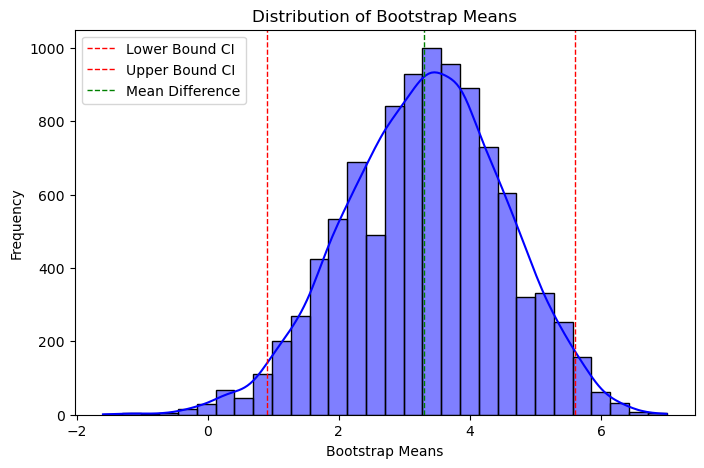

In [3]:
# Visualization of Bootstrap Means Distribution
plt.figure(figsize=(8, 5))
sns.histplot(bootstrap_means, bins=30, kde=True, color='blue')
plt.axvline(lower_bound, color='red', linestyle='dashed', linewidth=1, label='Lower Bound CI')
plt.axvline(upper_bound, color='red', linestyle='dashed', linewidth=1, label='Upper Bound CI')
plt.axvline(mean_difference, color='green', linestyle='dashed', linewidth=1, label='Mean Difference')
plt.title('Distribution of Bootstrap Means')
plt.xlabel('Bootstrap Means')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## C. Findings and Discussion
### 1. Conclusion regarding a Null Hypothesis of "no effect"
These are the results from the tests:

Mean Difference: 3.3

Confidence Interval: [0.9, 5.6]

Given these results, since the mean difference is positive and the confidence interval does not include zero, we reject the null hypothesis (H0).

Therefore, we can conclude that the vaccine has a positive effect on improving health scores for patients who received it.

### 2. Further Considerations
- Since the sample size is quite small, we may need to reconsider that a larger sample size can result in more accurate results.
- Patients should be randomly assigned to avoid selection bias.
- Long-term effects of the vaccine on the patients' health need to be researched to make sure it is in fact effective.

For the assignment, I used a Chatbot to help me with the code. This is the summary:

Here's a summary of our chat:

1. **Assignment Overview**: You needed to analyze data related to a new vaccine from AliTech using bootstrapping techniques to determine its effectiveness.

2. **Initial Data Issues**: You provided a dataset in CSV format, and we discussed loading and processing the data. You encountered a `KeyError` due to mismatched column names.

3. **CSV File Handling**: You provided a link to your CSV file, but it was determined that the URL was returning HTML instead of the CSV content. We discussed downloading the file and uploading it to your Jupyter notebook environment.

4. **Error Resolution**: You received errors indicating that the DataFrame was not being read correctly. I suggested checking and cleaning the column names and provided updated code to handle these potential issues.

5. **Final Recommendations**: I advised you to download the CSV file, upload it to Jupyter, and use the correct file path in your code. I provided a complete code snippet that includes data loading, cleaning, analysis, and visualization steps.

If you have any more questions or need further assistance, feel free to ask!

Chatbot log link: https://chatgpt.com/share/66fce5ab-c25c-8004-bd80-b31d85a0c268

## 9. Yes.

End of HW 4.